<a href="https://colab.research.google.com/github/sunnyskydream/Self-projects/blob/main/%5BProject%5D_Yelp_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BANA 277 Customer and Social Analytics_coursework

Yelp Case
https://store.hbr.org/product/yelp/709412

Learning:<br/>
*   t-test
*   exploratory data analysis: Yelp rating by Area and Google_cuisine




**Data preparation and cleaning**

In [14]:
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

data = pd.read_excel('test_G_Y_matching.xlsx', dtype={'cost level_Google':str} )
data.rename(columns={"cost level_Google": "cost_level_Google"},inplace=True)
data.sample(5)

,Name,Yelp_review_count,Google_review_count,Yelp_rating,Google_rating,Yelp_cuisine,Google_cuisine,cost_level_Google,Area,Zipcode,Count_of_likes_Google,Count_of_useful_Yelp,Count_of_funny_Yelp,Count_of_cool_Yelp
131,Original Oyster House,132,171,3.0000,3.7000,"Seafood, Restaurants",Restaurant,$,Downtown,15222,29,0,0,0
43,Thai Hana,124,196,3.0000,4.4000,"Thai, Restaurants, Sushi Bars, Japanese",Thai,NaN,Oakland,15213,33,103,40,50
119,Lucca,106,125,3.5000,3.9000,"Restaurants, Italian, Seafood",Italian,NaN,Oakland,15213,19,116,26,30
133,UUBU 6,13,25,3.5000,4.7000,"Restaurants, American (New)",American,$,South Side Slopes,15203,0,23,4,2
82,Umi,128,64,4.0000,4.1000,"Restaurants, Sushi Bars, Japanese",Japanese,$$$$,Shadyside,15232,22,244,68,66


In [15]:
data.shape

(200, 14)

In [16]:
data.duplicated().sum()

0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Yelp_review_count      200 non-null    int64  
 2   Google_review_count    200 non-null    int64  
 3   Yelp_rating            200 non-null    float64
 4   Google_rating          200 non-null    float64
 5   Yelp_cuisine           200 non-null    object 
 6   Google_cuisine         200 non-null    object 
 7   cost_level_Google      153 non-null    object 
 8   Area                   173 non-null    object 
 9   Zipcode                200 non-null    int64  
 10  Count_of_likes_Google  200 non-null    int64  
 11  Count_of_useful_Yelp   200 non-null    int64  
 12  Count_of_funny_Yelp    200 non-null    int64  
 13  Count_of_cool_Yelp     200 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 22.0+ KB


In [18]:
data.isna().sum()

Name                      0
Yelp_review_count         0
Google_review_count       0
Yelp_rating               0
Google_rating             0
Yelp_cuisine              0
Google_cuisine            0
cost_level_Google        47
Area                     27
Zipcode                   0
Count_of_likes_Google     0
Count_of_useful_Yelp      0
Count_of_funny_Yelp       0
Count_of_cool_Yelp        0
dtype: int64

In [19]:
data_clean = data.fillna('Unknown')
data_clean.isna().sum()

Name                     0
Yelp_review_count        0
Google_review_count      0
Yelp_rating              0
Google_rating            0
Yelp_cuisine             0
Google_cuisine           0
cost_level_Google        0
Area                     0
Zipcode                  0
Count_of_likes_Google    0
Count_of_useful_Yelp     0
Count_of_funny_Yelp      0
Count_of_cool_Yelp       0
dtype: int64

In [20]:
data_clean.describe()

,Yelp_review_count,Google_review_count,Yelp_rating,Google_rating,Zipcode,Count_of_likes_Google,Count_of_useful_Yelp,Count_of_funny_Yelp,Count_of_cool_Yelp
count,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000
mean,176.2600,275.7700,3.6775,4.2560,15217.5550,22.3350,203.2350,66.1050,103.3800
std,222.8826,283.2935,0.5950,0.3809,10.6967,27.2742,256.6012,101.2564,157.3152
min,3.0000,2.0000,2.0000,2.9000,15201.0000,0.0000,0.0000,0.0000,0.0000
25%,42.7500,104.0000,3.5000,4.1000,15211.0000,8.0000,47.2500,14.7500,21.0000
50%,113.0000,181.0000,4.0000,4.3000,15219.0000,14.0000,120.5000,32.0000,53.5000
75%,223.2500,375.0000,4.0000,4.5000,15222.0000,29.0000,250.0000,81.2500,119.0000
max,1629.0000,1978.0000,4.5000,5.0000,15275.0000,250.0000,1930.0000,793.0000,1229.0000


**Q3.A: How do the two sites compare in terms of the number of reviews (Volume) and star rating (Valence)?**<br/>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


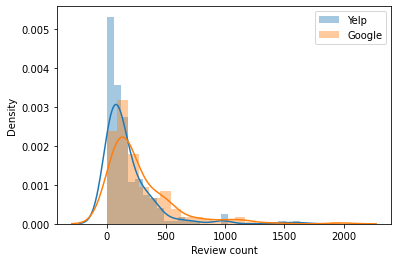

In [21]:
import matplotlib.pylab as plt
import seaborn as sns
sns.distplot(data_clean.iloc[:,1], label = "Yelp")
sns.distplot(data_clean.iloc[:,2], label = "Google")
plt.xlabel("Review count")
plt.legend()
plt.show()

In terms of number of reviews (Volume), Google’s review count tend to be more than Yelps. <br/>
Average Yelp_review_count is 176.26<br/>
Average Google_review_count is 275.77


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


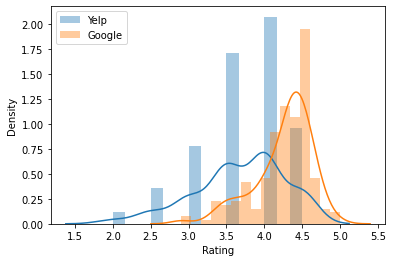

In [22]:
sns.distplot(data_clean.Yelp_rating, label = "Yelp")
sns.distplot(data_clean.Google_rating, label = "Google")
plt.xlabel("Rating")
plt.legend()
plt.show()

In terms of star rating (Valence), Google’s rating tends to be higher than Yelp’s. <br/>
Average Yelp_rating is 3.6775 <br/>
Average Google_rating is 4.256


**Q3.B: Is the review rating different across the two sites, and is the difference statistically significant?**<br/>
Step 1. Determine a null and alternate hypothesis.

In general, the null hypothesis will state that the two populations being tested have no statistically significant difference. The alternate hypothesis will state that there is one present. In this example we can say that:

H0 (Null Hypothesis): Rating in Yelp/Google are the same

HA (Alternative Hypothesis): Rating in Yelp/Google are different (2 sided test)

Step 2. Determine the Alpha (/confidence interval) and degrees of freedom

The typical value of α is 0.05. This means that there is 95% confidence that the conclusion of this test will be valid. The degree of freedom is min(N_Yelp-1, N_Google-1)

Step 3. Calculate the Confidence Interval &/ t-Statistic for Diffence in Means

In [23]:
#perform t-test
from scipy import stats
import numpy as np

Yelp_rating = data_clean.Yelp_rating
Google_rating = data_clean.Google_rating


In [24]:
# Calculate Point Estimate for Xb - Xa
Diff_YG = Yelp_rating.mean() - Google_rating.mean()
Diff_YG

-0.5784999999999991

In [25]:
# Calculate the Standard Error for Xb - Xa
SE_YG = np.sqrt(Yelp_rating.var()/len(Yelp_rating) + Google_rating.var()/len(Google_rating))
SE_YG 

0.0499551431952536

In [26]:
# Calculate the 95% Confidence Interval
min_95_CI_rating = Diff_YG - 1.96 * SE_YG
max_95_CI_rating = Diff_YG + 1.96 * SE_YG

print(min_95_CI_rating, max_95_CI_rating)

-0.6764120806626962 -0.48058791933730205


In [27]:
# Calculate Test Statistics
T_Score_rating = (Diff_YG - 0) / SE_YG
T_Score_rating

-11.580389185131278

In [28]:
# recalulate Test Statistics using 'stats' library
Test_rating = stats.ttest_ind(Yelp_rating, 
                       Google_rating, 
                       equal_var=False
                       )
Test_rating.statistic

-11.580389185131295

In [29]:
Test_rating.pvalue

2.3678739029063522e-26

Step 4. Make Conclusion

The T-score we calculated is correct, just the same as calculated by the 'stats' library.

Our conclusion:

T-score vs. 95% cutoff: |-11.58| > 1.96

p-val vs. 5%: close to 0 < 0.05

95% CI: (-0.6764, -0.4806)

Conclusion: Reject H0 => There is a siginificant difference in Rating between Yelp/Google group.

**Q3.C: For what types of restaurants (location, price rating, cuisine, etc) are the review ratings most different?  What factors might explain the results?**<br/>

a. By Top 10 Area<br/>
Restaurants in Downtown tend to receive lower rating in Yelp, and the higher rating tend to be in Strip District and Lawrenceville. 

First, this might be because of the difference of rating count between Downtown and Strip District and Lawrenceville. The number of rating count for Downtown is more than the count for Strip District and Lawrenceville, which the latter could be influenced  by extreme ratings.

Second, if we check on the map for the two district, downtown is known for while Strip District and Lawrenceville is “traditionally been a wholesale and retail place for fresh vegetables, fish, and meat. Today it also has many restaurants and nightclubs.” (source: https://en.wikivoyage.org/wiki/Pittsburgh/Strip_District-Lawrenceville)


In [30]:
area_weight_df = pd.DataFrame(data_clean.groupby('Area').Name.count().sort_values(ascending = False))
area_weight_df.columns = ['counts']
top_10_area_name = area_weight_df[0:10].index
top_10_area_data = data_clean[data_clean.Area.isin(top_10_area_name)]

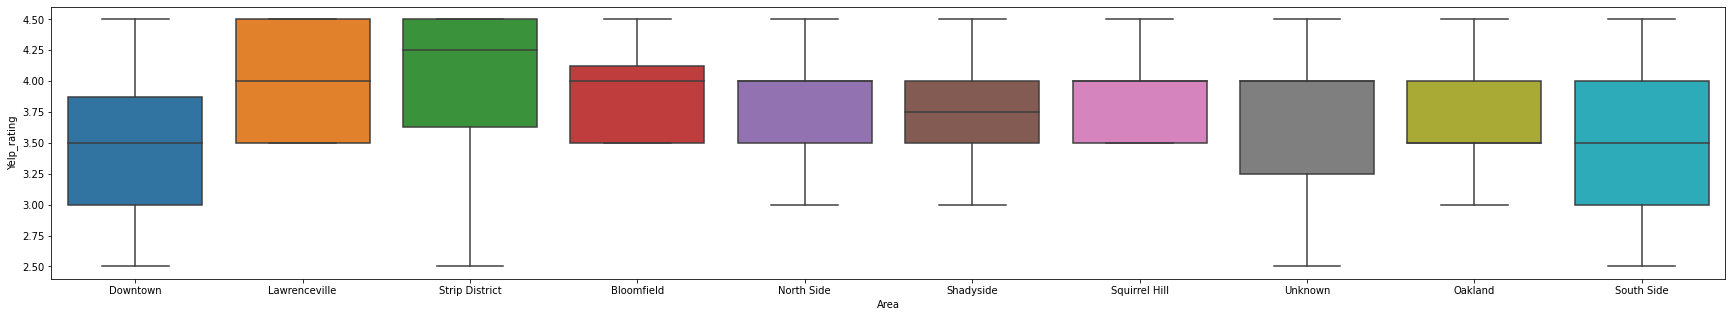

In [31]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='Area', y='Yelp_rating', data=top_10_area_data, showfliers = False)
plt.savefig('Yelp_rating by Area.png') #https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib

In [32]:
area_weight_df

,counts
Area,
Downtown,34
Unknown,27
South Side,20
Shadyside,14
North Side,14
Oakland,14
Bloomfield,12
Lawrenceville,12
Strip District,10


b.	By Top 15 Google_cuisine<br/>
 
Cuisine such as New American, Bistro and Grill tend to receive higher rating, while Sandwich and Mexican tend to receive lower rating. We skip "Restaurant" as this category doesn't provide more information on cuisine. However, if we check on the rating count of above mentioned popular and unpolular cuisine, each sample sizes are not even over 10, which indicates due to less sample size, the conclusion might not be representative and solid enough.


In [33]:
cuisine_weight_df = pd.DataFrame(data_clean.groupby('Google_cuisine').Name.count().sort_values(ascending = False))
cuisine_weight_df.columns = ['counts']
top_15_cuisine_name = cuisine_weight_df[0:15].index
top_15_cuisine_data = data_clean[data_clean.Google_cuisine.isin(top_15_cuisine_name)]

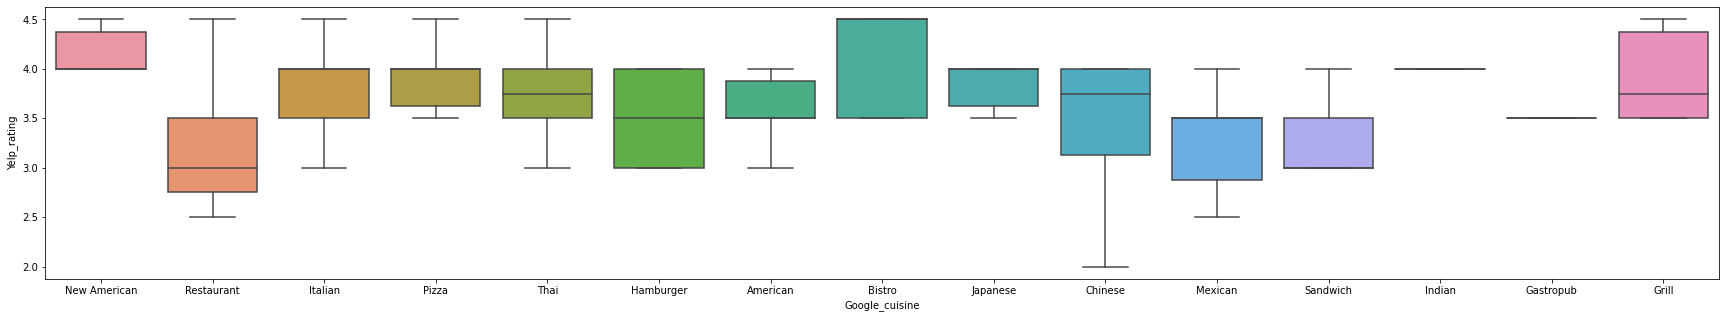

In [34]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='Google_cuisine', y='Yelp_rating', data=top_15_cuisine_data, showfliers = False)
plt.savefig('Yelp_rating by Google_cuisine.png') 

In [35]:
cuisine_weight_df

,counts
Google_cuisine,
Restaurant,23
Italian,19
American,18
Pizza,10
Thai,8
Mexican,8
Sandwich,7
Grill,6
Japanese,6


In [38]:
%%shell
jupyter nbconvert --to html /content/Yelp_case.ipynb

[NbConvertApp] Converting notebook /content/Yelp_case.ipynb to html
[NbConvertApp] Writing 409254 bytes to /content/Yelp_case.html
